In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows=100000)

In [4]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
test_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

In [6]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
train_df.shape

(100000, 8)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


In [9]:
import datetime

In [10]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])-datetime.timedelta(hours=4)

In [11]:
train_df['pickup_datetime']

0       2009-06-15 13:26:21+00:00
1       2010-01-05 12:52:16+00:00
2       2011-08-17 20:35:00+00:00
3       2012-04-21 00:30:42+00:00
4       2010-03-09 03:51:00+00:00
                   ...           
99995   2013-09-24 03:39:00+00:00
99996   2014-05-15 08:15:45+00:00
99997   2015-02-19 13:40:43+00:00
99998   2009-10-10 19:35:00+00:00
99999   2010-11-09 12:09:00+00:00
Name: pickup_datetime, Length: 100000, dtype: datetime64[ns, UTC]

In [12]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [13]:
train_df['Year'] = train_df['pickup_datetime'].dt.year
train_df['Month'] = train_df['pickup_datetime'].dt.month
train_df['Day'] = train_df['pickup_datetime'].dt.day
train_df['Hours'] = train_df['pickup_datetime'].dt.hour
train_df['Minutes'] = train_df['pickup_datetime'].dt.minute

In [14]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52
2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51


In [15]:
train_df['MorningNight'] = np.where(train_df['Hours']<12,0,1)

In [16]:
train_df.drop('pickup_datetime', axis=1, inplace=True)

In [17]:
def haversine_distance(train_df):
    R = 6371.0

    x1 = np.radians(train_df['pickup_latitude'])
    x2 = np.radians(train_df['dropoff_latitude'])

    dlat = np.radians(train_df['dropoff_latitude'] - train_df['pickup_latitude'])

    y1 = np.radians(train_df['pickup_longitude'])
    y2 = np.radians(train_df['dropoff_longitude'])

    dlong = np.radians(train_df['dropoff_longitude'] - train_df['pickup_longitude'])

    a = np.sin(dlat / 2.0)**2 + np.cos(x1) * np.cos(x2) * np.sin(dlong/2)**2

    c = 2 * np.arctan(np.sqrt(a), np.sqrt(1-a))

    return c * R
    

In [18]:
train_df['total_distance'] = haversine_distance(train_df)

In [19]:
train_df.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1, inplace=True)

In [20]:
train_df.head()

,key,fare_amount,passenger_count,Year,Month,Day,Hours,Minutes,MorningNight,total_distance
0,2009-06-15 17:26:21.0000001,4.5,1,2009,6,15,13,26,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,1,2010,1,5,12,52,1,8.450132
2,2011-08-18 00:35:00.00000049,5.7,2,2011,8,17,20,35,1,1.389525
3,2012-04-21 04:30:42.0000001,7.7,1,2012,4,21,0,30,0,2.799270
4,2010-03-09 07:51:00.000000135,5.3,1,2010,3,9,3,51,0,1.999157


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   key              100000 non-null  object 
 1   fare_amount      100000 non-null  float64
 2   passenger_count  100000 non-null  int64  
 3   Year             100000 non-null  int32  
 4   Month            100000 non-null  int32  
 5   Day              100000 non-null  int32  
 6   Hours            100000 non-null  int32  
 7   Minutes          100000 non-null  int32  
 8   MorningNight     100000 non-null  int64  
 9   total_distance   100000 non-null  float64
dtypes: float64(2), int32(5), int64(2), object(1)
memory usage: 5.7+ MB


**Create a regression model and classification model**

1. ****Linear Regressor****

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X = train_df.drop(['fare_amount', 'key'], axis=1)
y = train_df['fare_amount']

In [24]:
X_train,X_valid,y_train, y_valid = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_valid)
r2 = r2_score(y_valid, y_pred)
print(f"R2 Score: {r2:4f}")

rmse = mean_squared_error(y_valid, y_pred)
print(f"RMSE Score: {rmse:4f}")

R2 Score: 0.018029
RMSE Score: 96.173525


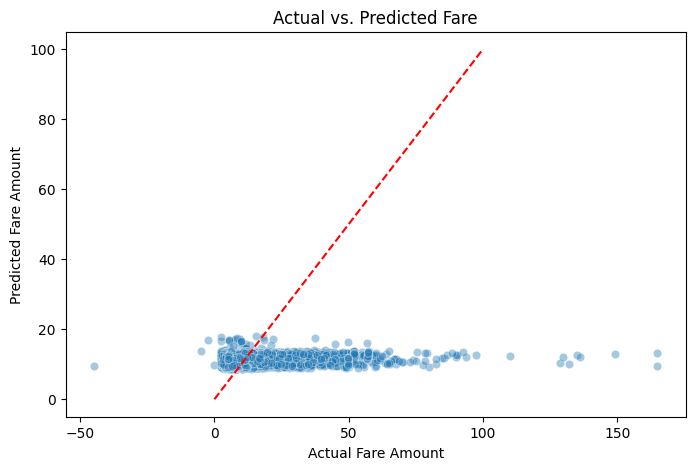

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_valid, y=y_pred, alpha=0.4)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs. Predicted Fare")
plt.plot([0, 100], [0, 100], '--', color='red')  # perfect prediction line
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


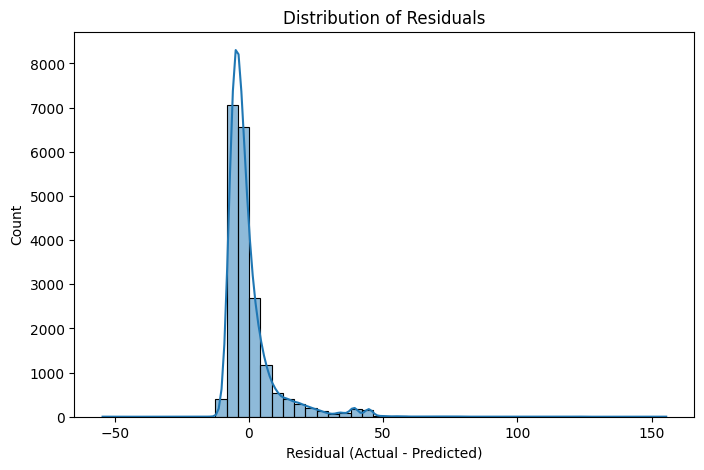

In [28]:
residuals = y_valid - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

****Ridge Regression (L2 Regularization)****

In [29]:
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(ridge, params, cv=5, scoring='neg_root_mean_squared_error')
grid_ridge.fit(X_train, y_train)

print(f"Best alpha (Ridge): {grid_ridge.best_params_['alpha']}")
print(f"Best RMSE (Ridge): {-grid_ridge.best_score_:.4f}")

Best alpha (Ridge): 100
Best RMSE (Ridge): 9.5941


****Lasso Regression(L1 Regularization)****

In [30]:
lasso = Lasso(max_iter=10000)
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(lasso, params, cv=5, scoring='neg_root_mean_squared_error')
grid_lasso.fit(X_train, y_train)

print(f"Best alpha (Lasso): {grid_lasso.best_params_['alpha']}")
print(f"Best RMSE (Lasso): {-grid_lasso.best_score_:.4f}")

Best alpha (Lasso): 0.01
Best RMSE (Lasso): 9.5942


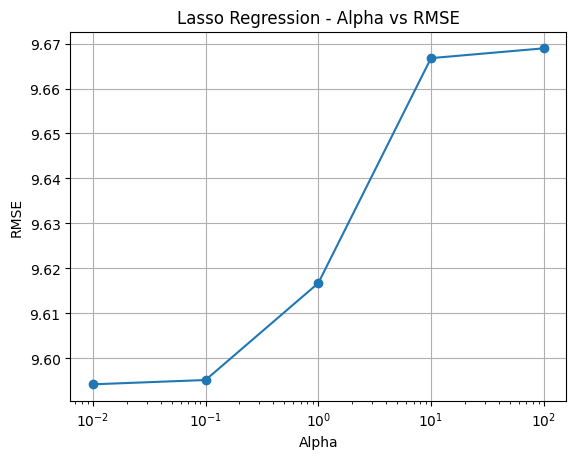

In [31]:
results = pd.DataFrame(grid_lasso.cv_results_)
alphas = results['param_alpha'].astype(float)
rmse_scores = -results['mean_test_score']

plt.plot(alphas, rmse_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Lasso Regression - Alpha vs RMSE')
plt.grid(True)
plt.show()

****XGBoost Regressor****

In [44]:
X = train_df.iloc[:,2:]
y = train_df.iloc[:,1]

In [45]:
##Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [50]:
print(X.dtypes)
print(y.dtypes)

passenger_count      int64
Year                 int32
Month                int32
Day                  int32
Hours                int32
Minutes              int32
MorningNight         int64
total_distance     float64
dtype: object
float64


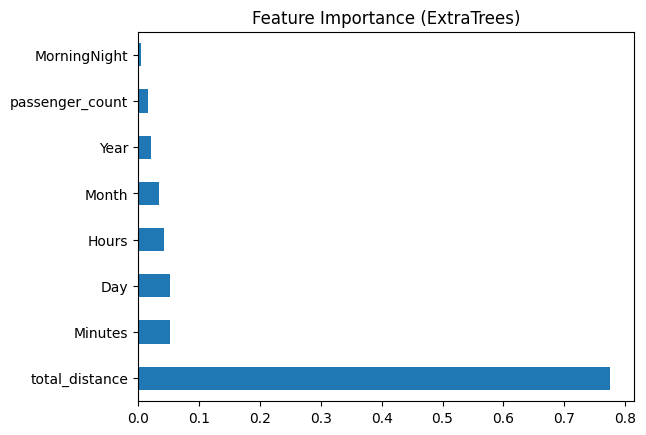

In [51]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance (ExtraTrees)")
plt.show()

In [53]:
X.head()

,passenger_count,Year,Month,Day,Hours,Minutes,MorningNight,total_distance
0,1,2009,6,15,13,26,1,1.030764
1,1,2010,1,5,12,52,1,8.450132
2,2,2011,8,17,20,35,1,1.389525
3,1,2012,4,21,0,30,0,2.799270
4,1,2010,3,9,3,51,0,1.999157


In [54]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [68]:
import xgboost

In [71]:
y_train.shape

(70000,)

In [72]:
regressor = xgboost.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
y_pred=regressor.predict(X_test)

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

/tmp/ipykernel_35/520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare_amount', ylabel='Density'>

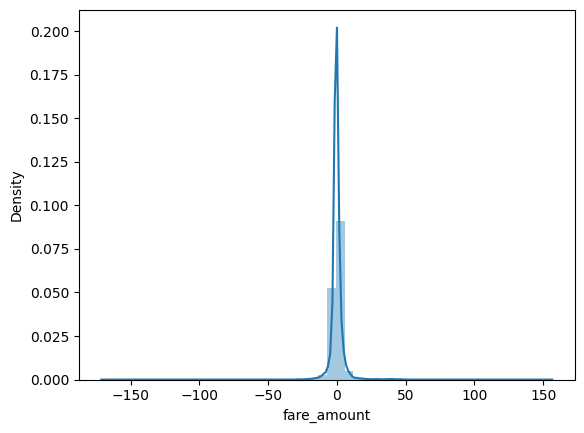

In [75]:
sns.distplot(y_test-y_pred)

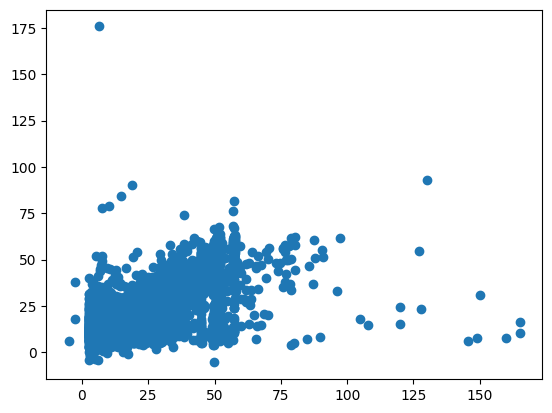

In [76]:
plt.scatter(y_test, y_pred)

In [77]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.8305079793446979
MAE: 2.373170371033162
MSE: 28.99273288426978
RMSE: 5.384490030102181
